In [1]:
from stlayout.treemap import TreeMap
from stlayout.hierarchyUtils import clean_idle_nodes, set_nodes_height
from fa2 import ForceAtlas2

tree_map = TreeMap('./data/moreno_health.vidi_r.json', 10, 10)
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=False)

In [3]:
import networkx as nx

clean_idle_nodes(tree_map.indexedNodes)
_, maxHeight = set_nodes_height(tree_map.indexedNodes, tree_map.root, tree_map.graph)
tree_map.build_hierarchy(maxHeight)
tree_map.find_links_in_super_nodes()

tree_map.construct_quotient_graph()
tree_map.layout_quotient_graphs(forceatlas2.forceatlas2_networkx_layout)

In [4]:
tree_map.treemap_layout(tree_map.root)


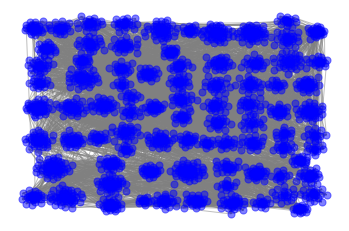

In [5]:
tree_map.draw()